In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import time



In [3]:
# notices = 'response.xpath('//span[@class="title-prefix"]/text()').getall()'
# links = ' response.xpath('//div[@class="article-title "]/a/@href').getall()'

## obtenemos la sopa principal

In [4]:
# Definir la URL y crear el objeto BeautifulSoup
url = 'https://www.pagina12.com.ar/'
s = requests.get(url)
s = BeautifulSoup(s.text)


# print(s.prettify())

### obtenemos los enlaces sin repterilos

In [5]:
# Obtener todos los enlaces y crear la lista de enlaces
noticias = s.find('div', attrs={'id': "main-wrapper"}).find_all("a")
lista_links = [s_noticias.get('href') for s_noticias in noticias]

# Expresión regular para verificar si una cadena es un enlace
enlace_regex = re.compile(r"https?://")

# Filtrar los enlaces válidos y crear una nueva lista que solo contenga los enlaces válidos
nueva_lista_links = []
for link in lista_links:
    if link is not None and enlace_regex.match(link):
        nueva_lista_links.append(link)

# Imprimir la nueva lista de enlaces válidos
print(nueva_lista_links)
lista_links =nueva_lista_links
# Borramos los links repetidos
lista_links=list(set(lista_links)) 
lista_links


['https://www.pagina12.com.ar/530631-se-realiza-el-plenario-de-la-militancia-para-organizar-la-lu', 'https://www.pagina12.com.ar/530631-se-realiza-el-plenario-de-la-militancia-para-organizar-la-lu', 'https://www.pagina12.com.ar/530635-sin-pruebas-pero-sin-dudas', 'https://www.pagina12.com.ar/530635-sin-pruebas-pero-sin-dudas', 'https://www.pagina12.com.ar/530611-la-quiebra-de-silicon-valley-bank-pone-en-alerta-al-sistema-', 'https://www.pagina12.com.ar/530611-la-quiebra-de-silicon-valley-bank-pone-en-alerta-al-sistema-', 'https://www.pagina12.com.ar/530716-frustraron-la-fuga-en-helicoptero-de-uno-de-los-capos-narco-', 'https://www.pagina12.com.ar/530716-frustraron-la-fuga-en-helicoptero-de-uno-de-los-capos-narco-', 'https://www.pagina12.com.ar/530512-cfk-en-rio-negro-expectativa-por-la-palabra-de-la-vicepresid', 'https://www.pagina12.com.ar/530512-cfk-en-rio-negro-expectativa-por-la-palabra-de-la-vicepresid', 'https://www.pagina12.com.ar/530297-nueve-intendentes-ya-se-bajaron-de-la-ree

['https://www.pagina12.com.ar/530532-jonah-schwartz-un-banjo-contra-el-bajon',
 'https://carasycaretas.org.ar/2023/03/06/el-sol-rojo-del-25/',
 'https://www.pagina12.com.ar/530507-melita-ruth-martin-carrasco-francisca-delica-torres',
 'https://www.pagina12.com.ar/529115-la-guerra-rusia-ucrania-minuto-a-minuto',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/530297-nueve-intendentes-ya-se-bajaron-de-la-reeleccion',
 'https://www.pagina12.com.ar/autores/1992-carolina-prieto',
 'https://www.pagina12.com.ar/autores/218948-elena-corvalan',
 'https://elplanetaurbano.com/2023/03/shakira-si-es-cuestion-de-confesar-me-he-creido-esa-fabula-de-que-una-mujer-definitivamente-necesita-a-un-hombre/',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-pais',
 'https://octubretv.com/videos/peliculas/lea-y-mira-dejan-su-huella/',
 'https://www.pagina12.com.ar/523155-asoma-el-holocausto-nuclear-detras-de-la-guerr

### ingresamos a acada enlace para obtener lo que deseamos con ejemplo el primer enlace 

In [6]:
enlace = lista_links[3]
enace_2 = requests.get(enlace)
s_s = BeautifulSoup(enace_2.text, 'lxml')
lista_notas = []
enace_2.url


'https://www.pagina12.com.ar/529115-la-guerra-rusia-ucrania-minuto-a-minuto'

## lo que queremos tener es Autor(muchos no tienen), fecha, titulo, subtiítulo, resumen, tags 

In [7]:
def datosPage(link):
    s_s = requests.get(link)
    s_s = BeautifulSoup(s_s.text, 'lxml')
    ret_dict = {'url':url}

    try:
        autor = s_s.find("div", attrs={"class":"author-name"}).text
        print(autor)
    except:
        print("No se pudo obtener el autor")
    
        
    try:
        fecha_hora = s_s.find("time").get('datetime')
        fecha = fecha_hora[:10]
        print(fecha)
    except:
        print("No se pudo obtener la fecha")

    try:
        titulo = s_s.find("h1").text
        print(titulo)
    except:
        print("No se pudo obtener el título")

    try:
        subtitulo = s_s.find("h2", attrs= {"class":"h4"}).text
        print(subtitulo)
    except:
        print("No se pudo obtener el subtitulo")

    try:
        resumen = s_s.find("h2", attrs= {"class":"h3"}).text
        print(resumen)
    except:
        print("No se pudo obtener el resumen")

    try:
        ret_dict['tags']  = s_s.find("a", attrs={"class":"tag"}).text
        print(tags)
    except:
        print("No se pudieron obtener las etiquetas")

In [8]:
datos2 = datosPage("https://www.pagina12.com.ar/529686-el-profugo-pepin-rodriguez-simon-se-fue-de-punta-del-este")
datos2

No se pudo obtener el autor
2023-03-08
El prófugo "Pepín" Rodríguez Simón se fue de Punta del Este
Tras ser localizado en su casa de Uruguay

No se pudieron obtener las etiquetas


In [9]:
def datosPage(link):
    s_s = requests.get(link)
    s_s = BeautifulSoup(s_s.text, 'lxml')
    ret_dict = {'url':link}

    try:
        autor = s_s.find("div", attrs={"class":"author-name"}).text
        ret_dict['autor'] = autor
    except:
        ret_dict['autor'] = "No se pudo obtener el autor"
    
        
    try:
        fecha_hora = s_s.find("time").get('datetime')
        fecha = fecha_hora[:10]
        ret_dict['fecha'] = fecha
    except:
        ret_dict['fecha'] = "No se pudo obtener la fecha"

    try:
        titulo = s_s.find("h1").text
        ret_dict['titulo'] = titulo
    except:
        ret_dict['titulo'] = "No se pudo obtener el título"

    try:
        subtitulo = s_s.find("h2", attrs= {"class":"h4"}).text
        ret_dict['subtitulo'] = subtitulo
    except:
        ret_dict['subtitulo'] = "No se pudo obtener el subtitulo"

    try:
        resumen = s_s.find("h2", attrs= {"class":"h3"}).text
        ret_dict['resumen'] = resumen
    except:
        ret_dict['resumen'] = "No se pudo obtener el resumen"

    try:
        tags = s_s.find_all("a", attrs={"class":"tag"})
        ret_dict['tags'] = [tag.text for tag in tags]
    except:
        ret_dict['tags'] = "No se pudieron obtener las etiquetas"
    
    return ret_dict


In [10]:

data = []
for i,url in enumerate(lista_links):
    try:    
        print(f'Scraping nota {i+1}/{len(lista_links)}...')
        data.append(datosPage(url))
        if (i+1) % 100 == 0:
            print("Esperando 1 minuto...")
            time.sleep(60)
    except:
        print("no paso ")
    

Scraping nota 1/186...
Scraping nota 2/186...
Scraping nota 3/186...
Scraping nota 4/186...
Scraping nota 5/186...
Scraping nota 6/186...
Scraping nota 7/186...
Scraping nota 8/186...
Scraping nota 9/186...
Scraping nota 10/186...
Scraping nota 11/186...
Scraping nota 12/186...
Scraping nota 13/186...
Scraping nota 14/186...
Scraping nota 15/186...
Scraping nota 16/186...
Scraping nota 17/186...
Scraping nota 18/186...
Scraping nota 19/186...
Scraping nota 20/186...
Scraping nota 21/186...
Scraping nota 22/186...
Scraping nota 23/186...
Scraping nota 24/186...
Scraping nota 25/186...
Scraping nota 26/186...
Scraping nota 27/186...
Scraping nota 28/186...
Scraping nota 29/186...
Scraping nota 30/186...
Scraping nota 31/186...
Scraping nota 32/186...
Scraping nota 33/186...
Scraping nota 34/186...
Scraping nota 35/186...
Scraping nota 36/186...
Scraping nota 37/186...
Scraping nota 38/186...
Scraping nota 39/186...
Scraping nota 40/186...
Scraping nota 41/186...
Scraping nota 42/186...
S

### podemos ver que los datos fueron guardados 


In [11]:
import pandas as pd
df = pd.DataFrame(data)
df

,url,autor,fecha,titulo,subtitulo,resumen,tags
0,https://www.pagina12.com.ar/530532-jonah-schwa...,Por Julia González,2023-03-10,"Jonah Schwartz, un banjo contra el bajón","El ex Los Alamos, Springlizard, Val Veneto y L...","Mañana toca para presentar Sand, segundo EP de...",[]
1,https://carasycaretas.org.ar/2023/03/06/el-sol...,No se pudo obtener el autor,No se pudo obtener la fecha,Caras y Caretas,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[]
2,https://www.pagina12.com.ar/530507-melita-ruth...,No se pudo obtener el autor,2023-03-11,"Melita Ruth Martín Carrasco, Francisca Delica ...",Los recordatorios de hoy,"Desde hace más de 30 años, Página/12 publica a...",[]
3,https://www.pagina12.com.ar/529115-la-guerra-r...,No se pudo obtener el autor,2023-03-10,"La guerra Rusia-Ucrania, minuto a minuto",Rusia volvió a atacar Zaporiyia,El Ejército ruso ataco de nuevo en la noche de...,"[Conflicto Rusia Ucrania, Vladimir Putin, Volo..."
4,https://www.pagina12.com.ar/suplementos/cultur...,No se pudo obtener el autor,No se pudo obtener la fecha,No se pudo obtener el título,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[]
...,...,...,...,...,...,...,...
181,https://www.pagina12.com.ar/autores/1998-julia...,No se pudo obtener el autor,No se pudo obtener la fecha,Julián Varsavsky,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[]
182,https://www.pagina12.com.ar/530725-juliana-di-...,No se pudo obtener el autor,2023-03-11,"Juliana di Tullio: ""A la única que quieren mat...",La senadora habló tras el discurso de la Vicep...,"En AM750, la legisladora reiteró su deseo de q...","[Cristina Fernández de Kirchner, Deuda FMI, Ca..."
183,https://www.pagina12.com.ar/secciones/la-rioja12,No se pudo obtener el autor,No se pudo obtener la fecha,La Rioja12,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[]
184,https://www.pagina12.com.ar/530487-el-cantauto...,No se pudo obtener el autor,No se pudo obtener la fecha,429 Too Many Requests,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[]


### si lo deseamos ver en formato diccionario también lo podermo hacer

In [17]:
data

[{'url': 'https://www.pagina12.com.ar/530532-jonah-schwartz-un-banjo-contra-el-bajon',
  'autor': 'Por Julia González',
  'fecha': '2023-03-10',
  'titulo': 'Jonah Schwartz, un banjo contra el bajón',
  'subtitulo': 'El ex Los Alamos, Springlizard, Val Veneto y Los Palos Borrachos reactiva Diente de Madera',
  'resumen': 'Mañana toca para presentar Sand, segundo EP de su proyecto folk, que incorpora sonidos, instrumentos y técnicas de la India.',
  'tags': []},
 {'url': 'https://carasycaretas.org.ar/2023/03/06/el-sol-rojo-del-25/',
  'autor': 'No se pudo obtener el autor',
  'fecha': 'No se pudo obtener la fecha',
  'titulo': 'Caras y Caretas',
  'subtitulo': 'No se pudo obtener el subtitulo',
  'resumen': 'No se pudo obtener el resumen',
  'tags': []},
 {'url': 'https://www.pagina12.com.ar/530507-melita-ruth-martin-carrasco-francisca-delica-torres',
  'autor': 'No se pudo obtener el autor',
  'fecha': '2023-03-11',
  'titulo': 'Melita Ruth Martín Carrasco, Francisca Delica Torres',
  

In [13]:
## para el caso de que se desee hacer primero la primera mitad para evitar el error 429 hacemos el ciclo por mitad 
# for i in range(len(lista_links)//2):
#     tema = lista_links[i]
#     try: 
#         enace_2 = requests.get(tema)
#         s_s = BeautifulSoup(enace_2.text, 'lxml')
#         tittle = s_s.find("h1")
#         print(tittle.text)
#         lista_notas.append(tittle.text)
#     except Exception as e:
#         print(tema)
#         pass

## y luego  hacemos la otra mitad 
# for i in range(len(lista_links)//2):
#     tema = lista_links[i]
#     try: 
#         enace_2 = requests.get(tema)
#         s_s = BeautifulSoup(enace_2.text, 'lxml')
#         tittle = s_s.find("h1")
#         print(tittle.text)
#         lista_notas.append(tittle.text)
#     except Exception as e:
#         print(tema)
#         pass


### guardamos los datos obtenidos en csv

In [14]:
df.to_csv('11march2023.csv')

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargamos los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('vader_lexicon')

# Creamos el objeto SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Analizamos las emociones presentes en los títulos
for article in data:
    title = article['resumen']
    tokens = word_tokenize(title.lower())
    scores = analyzer.polarity_scores(title)
    print("Título: ", title)
    print("Palabras: ", tokens)
    print("Scores: ", scores)
    print()


Título:  Mañana toca para presentar Sand, segundo EP de su proyecto folk, que incorpora sonidos, instrumentos y técnicas de la India.
Palabras:  ['mañana', 'toca', 'para', 'presentar', 'sand', ',', 'segundo', 'ep', 'de', 'su', 'proyecto', 'folk', ',', 'que', 'incorpora', 'sonidos', ',', 'instrumentos', 'y', 'técnicas', 'de', 'la', 'india', '.']
Scores:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Título:  No se pudo obtener el resumen
Palabras:  ['no', 'se', 'pudo', 'obtener', 'el', 'resumen']
Scores:  {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.296}

Título:  Desde hace más de 30 años, Página/12 publica a diario los recordatorios de los desaparecidos y las desaparecidas que sus familias y amigos acercan a nuestra redacción en cada aniversario. Con el mismo compromiso que hemos asumido en todos estos años, ahora también tienen un lugar en nuestra web
Palabras:  ['desde', 'hace', 'más', 'de', '30', 'años', ',', 'página/12', 'publica', 'a', 'diario', 'los', 'record

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [97]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_emotion_scores(text):
    sid = SentimentIntensityAnalyzer()
    sentences = tokenize.sent_tokenize(text)
    scores = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        for k in ss:
            scores[k] += ss[k]
    return scores
emotions = pd.DataFrame(df['titulo'].apply(get_emotion_scores).tolist())
df_with_emotions = pd.concat([df, emotions], axis=1)
df_with_emotions.head()


,url,autor,fecha,titulo,subtitulo,resumen,tags,sentimiento_titulo,neg,neu,pos,compound
0,https://www.pagina12.com.ar/530532-jonah-schwa...,Por Julia González,2023-03-10,"Jonah Schwartz, un banjo contra el bajón","El ex Los Alamos, Springlizard, Val Veneto y L...","Mañana toca para presentar Sand, segundo EP de...",[],Neutro,0.000,1.000,0.0,0.000
1,https://carasycaretas.org.ar/2023/03/06/el-sol...,No se pudo obtener el autor,No se pudo obtener la fecha,Caras y Caretas,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[],Neutro,0.000,1.000,0.0,0.000
2,https://www.pagina12.com.ar/530507-melita-ruth...,No se pudo obtener el autor,2023-03-11,"Melita Ruth Martín Carrasco, Francisca Delica ...",Los recordatorios de hoy,"Desde hace más de 30 años, Página/12 publica a...",[],Neutro,0.000,1.000,0.0,0.000
3,https://www.pagina12.com.ar/529115-la-guerra-r...,No se pudo obtener el autor,2023-03-10,"La guerra Rusia-Ucrania, minuto a minuto",Rusia volvió a atacar Zaporiyia,El Ejército ruso ataco de nuevo en la noche de...,"[Conflicto Rusia Ucrania, Vladimir Putin, Volo...",Neutro,0.000,1.000,0.0,0.000
4,https://www.pagina12.com.ar/suplementos/cultur...,No se pudo obtener el autor,No se pudo obtener la fecha,No se pudo obtener el título,No se pudo obtener el subtitulo,No se pudo obtener el resumen,[],Negativo,0.306,0.694,0.0,-0.296


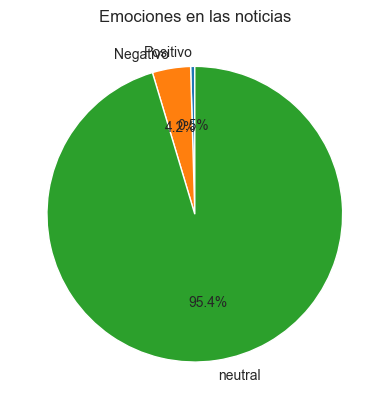

In [98]:
import matplotlib.pyplot as plt

# Obtener el total de cada columna
total_pos = df_with_emotions['pos'].sum()
total_neg = df_with_emotions['neg'].sum()
total_neu = df_with_emotions['neu'].sum()



# Crear una lista con los valores de cada categoría
sizes = [total_pos, total_neg, total_neu]

# Crear una lista con las etiquetas de cada categoría
labels = ['Positivo', 'Negativo', 'neutral'  ]

# Crear la gráfica de tipo pie
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Emociones en las noticias')

# Mostrar la gráfica
plt.show()
